# Gradient Stochastique et régularisation  $\ell^1$

<h1><a id='toc'></a>Sommaire</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#I">I. Introduction </a></li>
        <ul>
        <li><a href="#I1">I.1. Un exemple en dimension 1</a></li>
        <li><a href="#I2">I.2. Un cas degeneré</a></li>
        <li><a href="#I3">I.3. Un exemple en plus grande dimension </a></li>
        </ul>
        <li><a href="#II">II. Optimisation numérique de $F_\lambda$ par ISTA</a></li>
        <ul>
            <li><a href="#II1">II.1. Réinterpretation de la méthode du gradient à pas constant</a></li> 
            <li><a href="#II2">II.2. ISTA </a></li> 
        </ul>
        <li><a href="#III">III. Application à l'optimisation stochastique</a></li>
    </ul>
</div>
<br>
<hr>

Importation des bibliothèques

In [96]:
from toynn_2023 import *
# charge aussi les bibliothèques suivantes :
import numpy as np
from numpy import random as nprd
from matplotlib import pyplot as plt
from matplotlib import cm as cm
from copy import deepcopy as dcp
import math as mt
import math as mt
from numpy import linalg as ln

# I. Introduction <a id='I'></a>

<a href="#toc">top</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I">I.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I1">I.1</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I2">I.2</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I3">I.3</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#II">II.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#II1">II.1</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#II2">II.2</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#III">III.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#bot">bot.</a>

On veut optimiser une fonction objectif régulière et convexe $F(w)$ mais on veut aussi privilégier les solutions parcimonieuses, c'est-à-dire les paramètres $w$ avec un grand nombre de composantes nulles. Pour cela, nous pénalisons la fonction objectif en ajoutant le terme <i>régularisant</i> $\lambda\|w\|_1$. Ici $\lambda\geq0$ est le paramètre de pénalisation et
$$
\|w\|_1 :=\sum_{j=0}^{N-1}|w_j|=|w_0|+|w_1|+\dots+|w_{N-1}|
$$
est la norme $\ell^1$ du vecteur $w$.

<a id='I1'></a>
<h2>I.1. Un exemple en dimension 1</h2>

<a href="#toc">top</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I">I.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I1">I.1</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I2">I.2</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I3">I.3</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#II">II.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#II1">II.1</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#II2">II.2</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#III">III.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#bot">bot.</a>

Considérons d'abord le cas $N=1$. Soit $\,\bar w\in\mathbb{R}\,$. On définit $\,f(w)=\frac12|w-\bar w|^2\,$ et pour $\,\lambda\ge 0\,$, on pose
$$\,f_\lambda(w):=f(w)+\lambda\|w\|_1\,=\, \frac12|w-\bar w|^2+\lambda|w|.$$
Le minimiseur de $\,f\,$ est évidemment $\,\bar w\,$. Dans quelle mesure est-il perturbé par le terme régularisant ? Découvrons-le en calculant le minimiseur de $\,f_\lambda$.

**Remarques préliminaires.** La fonction $f$ est strictement convexe (elle est 1-convexe) et $w\mapsto |w|$ est convexe donc la fonction résultante $f_\lambda$ est $1$-convexe. Nous concluons que $f_\lambda$ admet un unique minimiseur. On le note $w^*$ comme d'habitude.

Pour $\lambda>0$, la fonction $f_\lambda$ n'est pas dérivable en $0$. Cependant, elle  est dérivable en tout point $w\neq0$ et si $w^*\neq 0$, on a la condition d'optimalité

$$
0=f'_\lambda(w^*)=w^*-\bar w +\lambda \mathop{signe}(w^*). \tag{0}
$$
Inversement, si (0) est vrai en point $\hat w\neq0$, alors $\hat w =w^*$.

Pour l'analyse on considère quatre cas selon les valeurs de $\bar w$ et $\lambda$.

**1. Premier cas**$\,$ Si $\bar w=0$, on a évidemment $w^*=0$ $~~$($\,f_\lambda(0)=0\,$ et $\, f_\lambda(w)>0\,$ si $\,w\neq0\,$).

**2. Deuxième cas**$\,$ Si $\lambda=0\,$ alors $\,f_\lambda(w)=f(w)=\frac12|w-\bar w|^2\,$ et le minimiseur est $\,w^*=\bar w$.

**3. Troisième cas** $\,$Nous supposons $\,\lambda>0\,$ et $\,\bar w>0\,$. Nous remarquons d'abord que $\,w^*\geq 0$.
En effet, pour $\,w<0\,$, il existe $\quad|w-\bar w|= \bar w - w>\bar w = |0-\bar w|,\quad $ so
$\quad
f_\lambda(w)>f_\lambda(0)\geq f_\lambda(w^*)
\quad$ et nous voyons que $\,w^*\neq w$.

Ensuite, si $\,w^*>0\,$, alors par (0) nous avons $\,w^*=\bar w-\lambda$. Ce nombre est positif si et seulement si $\,\bar w>\lambda$. Nous concluons que :

$$
w^*=\begin{cases}\bar w-\lambda &\text{if } \bar w>\lambda,\\
\quad 0 & \text{if } 0<\bar w\leq\lambda. \end{cases}
$$

**4. Quatrième cas** Nous supposons toujours $\,\lambda>0\,$ mais $\,\bar w<0$. En raisonnant comme ci-dessus, on voit que $\,w^*\leq 0\,$ puis

$$
w^*=\begin{cases}\bar w+\lambda &\text{if } \bar w<-\lambda,\\
\quad 0 & \text{if } -\lambda\leq \bar w<0. \end{cases}
$$

**Conclusion** $\,$En résumé :
$$
w^*=\begin{cases}\bar w-\lambda\ \text{sign}\,\bar w &\text{if } |\bar w|>\lambda,\\
\qquad 0 & \text{if } |\bar w|\leq \lambda. \end{cases}
$$

On peut mesurer la distance entre le minimiseur de $\,f\,$ et le minimiseur de $\,f_\lambda\,$ :

$$
|\bar w|>\lambda\ \Longrightarrow\ |w^* -\bar w|=\lambda\qquad\text{and}\qquad
|\bar w|\le\lambda\ \Longrightarrow\ |w^* -\bar w|=|\bar w|.
$$

Dans tous les cas :$\qquad\qquad\qquad\qquad\qquad|w^* -\bar w|\leq \lambda$.

Voici les tracés du graphique de la fonction $\bar w\mapsto w^*$ pour $\lambda =0$, $\lambda=1$, $\lambda=2$ et $\lambda=4$.

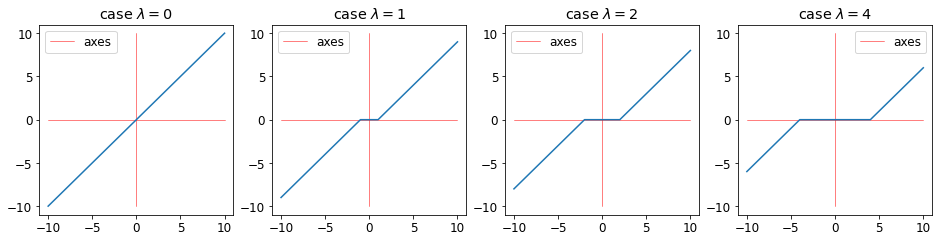

In [97]:
plt.rcParams.update({'font.size': 12})
if 1==1:
    buildf_lbda = lambda L: lambda w: np.where(w>L, w-L, 
                                               np.where( w<-L, w+L, 0))
    lbda = (0 , 1, 2 , 4)
    w=np.linspace(-10,10,41)
    plt.figure(figsize=(16,3.5))
    for i in range(4):
        plt.subplot(141 + i)
        plt.plot([-10, 10], [0, 0],'r',linewidth=.5, label='axes')
        plt.plot([0, 0], [-10, 10],'r',linewidth=.5)
        plt.plot(w, buildf_lbda(lbda[i])(w))
        plt.title(f"case $\lambda=$" + str(lbda[i]))
        plt.legend()

<a id='I2'></a>
<h2>I.2. Un cas dégénéré</h2>

<a href="#toc">top</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I">I.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I1">I.1</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I2">I.2</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I3">I.3</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#II">II.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#II1">II.1</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#II2">II.2</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#III">III.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#bot">bot.</a>

On considère ici, $N=2$ et 
$$
F(w):=\dfrac12(2w_0 + w_1 - 1)^2.
$$

**Exercice 1**

a) La fonction $F$ est-elle convexe ? fortement convexe ? coercive?

b) Trouvez les minimiseurs dans $\mathbb{R}^2$ de $F$.

c) Soit $\lambda>0$. Trouvez les minimiseurs de

$$
F_\lambda(w)=F(w)+\lambda\|w\|_1:= \dfrac12(2w_0 + w_1 - 1)^2 +\lambda (|w_0| +|w_1|).
$$

*__Indication :__ justifier que si la compososante $w^*_j$ d'un point de minimum $w^*$ est non nulle alors $\dfrac {\partial F_\lambda(w^*)}{\partial w_j}$ est bien défini et nul.*

d) Interprétez le résultat de (c) : quels sont les effets du terme régularisant $\lambda \|w\|_1$ ?

<div class="alert alert-block alert-info" style="margin-top : 0px">
    
___Solution 1.a.___

 F est quadratique, et donc convexe. 

 Elle n'est pas coercive car en considérant le droite $w_1=-2w_0+1$, on a $F(w) = 0$ pour tout $w$ appartenant à cette droite. Lorsque $\|w_0\| \to \infty$, $\|w\| \to \infty$ mais $F(w) = 0$ sur cette droite. 

 $H_f(x) = \begin{pmatrix} 4 & 2 \\ 2 & 1 \end{pmatrix}$. Calculons les valeurs propres de $H_f(x)$ : $\lambda_1 = 5$ associé à $(2,1)$ et $\lambda_2 = 0$ associé à $(1,-2)$. $H_f(x)$ ayant pour valeur propre 0, elle ne peux pas être définie positive, donc $f$ n'est pas fortement convexe.




</div>

<div class="alert alert-block alert-info" style="margin-top : 0px">
    
___Solution 1.b.___
Pour trouver les minimiseurs d'une fonction convexe $C^1$ sur $\mathbb{R}^N$ , on cherche les points où $\nabla F(w)=0$ , ce qui est équivalent à $2w_0+w_1 -1$. L'ensemble des minimiseurs de $F$ est la droite affine :
$$
L :=\{(x_0,1-2x_0) : x_0\in\mathbb{R}\}.
$$

</div>

<div class="alert alert-block alert-info" style="margin-top : 0px">
    
___Solution 1.c.___


Si la compososante $w^*_j$ d'un point de minimum $w^*$ est non nulle alors $\dfrac {\partial F_\lambda(w^*)}{\partial w_j}= \dfrac {\partial F(w^*)}{\partial w_j} + \lambda \mathop{signe}(w^*_j) $.

Supposons $w^*_0 \gt 0$ et $w^*_1 \gt 0$. Alors $$\nabla f_{\lambda}(x)=[4x_0 + 2x_1 - 2 + \lambda, 2x_0 + x_1 - 1 + \lambda]^T = [0,0] $$. On ne peut trouver aucune solution à ce système sauf si $\lambda = 0$, or ceci contredit l'hypothèse donc nous n'avons aucune solution. 
Si l'on suppose de la même manière $w^*_0 \lt 0$ et $w^*_1 \gt 0$ ou $w^*_0 \gt 0$ et $w^*_1 \lt 0$ ou $w^*_0 \lt 0$ et $w^*_1 \lt 0$, on ne trouve aucune solution, donc nécessairement $w^*_0 = 0$ ou $w^*_1 = 0$.

Supposons alors $w^*_0 = 0$.

- Si $w^*_1 \gt 0$, alors $f(x)=\dfrac{1}{2}(x_1 - 1)^2 + \lambda x_1$. On cherche les points où $\nabla f_{\lambda}(x) = 0$. On a $\dfrac{d}{dx}f(x)= x_1 - 1 + \lambda = 0 \Leftrightarrow x_1 = 1 - \lambda$. Donc $w^*_1 = 1 - \lambda$. Ce qui est seulement possible pour $\lambda \lt 1$.

- Si $w^*_1 \lt 0$, alors $f(x)=\dfrac{1}{2}(x_1 - 1)^2 - \lambda x_1$. On cherche les points où $\nabla f_{\lambda}(x) = 0$. On a $\dfrac{d}{dx}f(x)= x_1 - 1 - \lambda = 0 \Leftrightarrow x_1 = 1 + \lambda$. Donc $w^*_1 = 1 + \lambda$. Ce qui contredit que $w^*_1 \lt 0$.

Supposons alors $w^*_1 = 0$.

- Si $w^*_0 \gt 0$, alors $f(x)=\dfrac{1}{2}(2x_0 - 1)^2 + \lambda x_0$. On cherche les points où $\nabla f_{\lambda}(x) = 0$. On a $\dfrac{d}{dx}f(x)= 2x_0 - 1 + \lambda = 0 \Leftrightarrow x_0 = \dfrac{1 - \lambda}{2}$. Donc $w^*_0 = \dfrac{1 - \lambda}{2}$. Ce qui est seulement possible pour $\lambda \lt 1$.

- Si $w^*_0 \lt 0$, alors $f(x)=\dfrac{1}{2}(2x_0 - 1)^2 - \lambda x_0$. On cherche les points où $\nabla f_{\lambda}(x) = 0$. On a $\dfrac{d}{dx}f(x)= 2x_0 - 1 - \lambda = 0 \Leftrightarrow x_0 = \dfrac{1 + \lambda}{2}$. Donc $w^*_0 = \dfrac{1 + \lambda}{2}$. Ce qui contredit que $w^*_0 \lt 0$. 

Enfin, si $\lambda \geq 1$, on a nécessairement $w^*_0 = w^*_1 = 0$.
</div>

<div class="alert alert-block alert-info" style="margin-top : 0px">
    
___Solution 1.d.___

On reconnait $\lambda$ comme un coefficient de régularisation. Pour $0 \lt \lambda \lt 1$, une des deux composantes du minimum est nulle, et l'autre est égale à $1 - \lambda$ ou $1 + \lambda$. Pour $\lambda \geq 1$, les deux composantes du minimum sont nulles. Le minimisuer est désormais unique, par propriété de sélection du terme régularisant.  Cette fonction correspond à la régularisation lasso de F(w)

</div>

<a id='I3'></a>
<h2>I.3. Un exemple en plus grande dimension</h2>

<a href="#toc">top</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I">I.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I1">I.1</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I2">I.2</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I3">I.3</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#II">II.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#II1">II.1</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#II2">II.2</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#III">III.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#bot">bot.</a>

Considérons maintenant une fonction quadratique non dégénérée comme en **I.1** mais en dimension supérieure $N\geq 1$. Nous fixons $\bar w\in \mathbb{R}^N$ et une suite de nombres $a_0,a_1,\dots,a_{N-1}>0$ et nous posons pour $w\in\mathbb{ R}^N$,

$$\tag{1}
F(w):=\dfrac12\sum_{j=0}^{N-1} a_j (w_j-\bar w_j)^2\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad
\qquad\qquad=\dfrac{a_0}2(w_0-\bar w_0)^2 + \dfrac{a_1}2(w_1-\bar w_1)^2+\dots + \dfrac{a_{N-1}} 2(w_{N-1}-\bar w_{N-1})^2.
$$

Comme dans la partie <a href="#I1">I.1.</a> la fonction $\,F\,$ est fortement convexe : elle est $\gamma$-convexe pour
$$\gamma=\min\{a_j,j=0,\dots,N-1\}\, >0.$$
On note $\,\bar w\,$ l'unique minimiseur de $\,F$.

Fixons $\lambda>0$ et fixons comme plus haut, $F_\lambda(w):=F(w)+\lambda \|w\|_1$. La fonction $F_\lambda$ est à nouveau fortement convexe, on note son unique minimiseur $w^*$. 

À quelle distance de $w^*$ se trouve $\bar w$ ? À quel point est-il plus parcimonieux que $\bar w$ ? Pour le savoir nous allons déterminer explicitement $w^*$.

Remarquons tout d'abord que $F_\lambda$ se divise en $N$ fonctions d'un seul paramètre :

$$
F_\lambda(w)=\sum_{j=0}^{N-1} F^{(j)}_\lambda (w_j)\qquad
\text{with}\quad F^{(j)}_\lambda (w_j)=\dfrac{a_j}2(w_j-\bar w_j)^2 + \lambda |w_j|
= a_j\left\{\dfrac12(w_j-\bar w_j)^2 + \dfrac{\lambda}{a_j} |w_j|\right\}.
$$

Puisque les paramètres des fonctions $F_\lambda^{(j)}$ sont indépendants les uns des autres, nous pouvons optimiser séparément les $F_\lambda^{(j)}$. L'expression entre accolades est de la forme $f_{\lambda/a_j}(w_j)$ étudiée en <a href="#I1">I.1.</a>. Nous en déduisons que

$$\tag{2}
\text{Pour }j=0,\dots,N-1,\ \quad w^*_j=\begin{cases}\bar w_j-\dfrac\lambda{a_j}\ \text{signe}\, \bar w_j &\text{si } |a_j\bar w_j|>\lambda,\\
\qquad 0 &\text{si } |a_j\bar w_j|\leq \lambda. \end{cases}
$$

Notez que $|a_j\bar w_j|= \left| \dfrac{\partial F}{\partial w_j}(0)\right|$ mesure la sensibilité de $F$ par rapport aux variations de la $j$-ième variable .

Nous pouvons interpréter la formule ci-dessus comme suit :

$\quad\ $a) si cette sensibilité est suffisamment petite, _c'est-à-dire_ $\ \left| \dfrac{\partial F}{\partial w_j}(0)\right|\leq \lambda\ $ alors $w^*_j$ vaut 0. On a alors
$$
\tag{3a}
|a_j(w^*_j - \bar w_j)| \leq\lambda.
$$


$\quad\ $b) pour des sensibilités plus grandes $\ \left| \dfrac{\partial F}{\partial w_j}(0)\right| > \lambda\ $, $w^*_j$ est une approximation de $\bar w_j$, avec
$$
\tag{3b}
|a_j(w^*_j - \bar w_j)| =\lambda.
$$

**Remarque :** En réinterprétant (3a) et (3b) en fonction des composantes de $\nabla F$, on voit que pour chaque $j$
$$
\left|\dfrac{\partial F(w^*)}{\partial w_j} \right|\leq\lambda.
$$
Plus précisément, si on fixe tous les $\,w_k^*\,$ pour $k\,\neq j\,$,

$$\tag{4}
\text{le terme est $\,w_j^*\,$ minimise $\,|w_j|\,$ dans l'ensemble }\\
\left\{w_j\in\mathbb{R}\ :\ \left|\dfrac{\partial F}{\partial w_j}\right|(w^*_0,\dots,w^*_{j-1 },w_j,w^*_{j+1},\dots, w^*_{N-1})\leq\lambda\right\}.
$$

Ceci est également vrai pour toute fonction convexe $F$ de classe $C^1$, pas seulement pour les fonctions quadratiques.

Nous voyons que si nous choisissons $\lambda$ petit, $w^*$ sera une petite perturbation du minimiseur exact de $F$. De plus, si mettre $w^*_j$ à 0 ne crée qu'un gradient négligeable (inférieur à $\lambda$) alors $w^*_j$ vaut 0. En ce sens, la régularisation favorise la *parcimonie* de $w^*$.

# II. Optimisation numérique de $F_\lambda$ par ISTA<a id='II'></a> 

<a href="#toc">top</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I">I.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I1">I.1</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I2">I.2</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I3">I.3</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#II">II.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#II1">II.1</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#II2">II.2</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#III">III.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#bot">bot.</a>

__(__ ***''ISTA'' signifie ``Iterative Shrinkage-Thresholding Algorithm''*** __)__

Nous voulons optimiser une fonction convexe régulière $F:\mathbb{R}^N\to \mathbb{R}$ avec un terme de régularisation $\lambda \|w\|_1$ où le paramètre $\lambda\geq 0$ est donné.

<a id='II1'></a>
<h2>II.1. Réinterpretation de la méthode du gradient à pas fixe</h2>

<a href="#toc">top</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I">I.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I1">I.1</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I2">I.2</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I3">I.3</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#II">II.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#II1">II.1</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#II2">II.2</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#III">III.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#bot">bot.</a>

Supposons d'abord $\,\lambda =0$. Dans ce cas $\,F_\lambda=F\,$ est régulière et nous pouvons utiliser la méthode de gradient avec pas fixe $\,\alpha>0$. Nous commençons par réinterpréter cette méthode comme une succession de résolutions de problèmes d'optimisation. Nous commençons par un vecteur initial $\,w^0\in\mathbb{R}^N\,$ et nous construisons récusivement la suite $w^0$, $w^1$,$w^2$, $\ points$, avec les règles suivantes :

$\qquad$a) A l'étape $\,k$, connaissant l'itération courante $\,w^k$, on définit la fonction

$$\tag{5}
\Phi^k(w):=F(w^k) +\left<\nabla F(w^k);w-w^k\right> + \dfrac1{2\alpha}\|w-w^k\|^ 2
$$

Pour construire la fonction $\,\Phi^k\,$ nous sommes parti du développement de Taylor au premier ordre de $F$ et nous avons ajouté le terme quadratique $\,\|w-w^k\|^2/(2\alpha)$.  $\Phi^k$ est donc une approximation (au premier ordre) de $\,F\,$ près de $\,w^k\,$ et est une fonction quadratique définie positive.
En particulier, il admet un minimiseur unique.

$\qquad$b) $w^{k+1}\,$ est défini comme le minimiseur de $\,\Phi^k$.

Il est facile de déterminer le minimiseur de la fonction quadratique $\Phi^k$. Nous trouvons

$$
\tag{6}
w^{k+1} = w^k - \alpha \nabla F(w^k)
$$

Comme annoncé, nous retrouvons la formule donnant $\,w^{k+1}\,$ en fonction de $w^k$ pour la méthode de descente de gradient de pas $\alpha$.

**Exercice 2** Justifier la formule (6).

<div class="alert alert-block alert-info" style="margin-top: 0px">
    
___Solution 2.___ 
    
$\Phi^k$ est une fonction quadratique 1-convexe tel que : 

$\Phi^k(w):=F(w^k) +\left<\nabla F(w^k);w-w^k\right> + \dfrac1{2\alpha}\|w-w^k\|^ 2$

D'où $\dfrac{\partial \Phi^k}{\partial w}(w) = \nabla F(w^k) + \dfrac{1}{\alpha}(w - w^k)$

On cherche son minimiseur caractérisé par $\dfrac{\partial \Phi^k}{\partial w}(w) = 0$. 

$\Leftrightarrow$ $\dfrac{\partial \Phi^k}{\partial w}(w)$ = $\nabla F(w^k) + \dfrac{1}{\alpha}(w - w^k)$ = 0 

$\Leftrightarrow$ w = $w^k - \alpha \nabla F(w^k)$

On retrouve bien la formule (6).

</div>

<a id='II2'></a>
<h2>II.2. ISTA</h2>

<a href="#toc">top</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I">I.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I1">I.1</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I2">I.2</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I3">I.3</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#II">II.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#II1">II.1</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#II2">II.2</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#III">III.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#bot">bot.</a>

Nous supposons maintenant $\lambda>0$ de sorte qu'on a un terme de régularisation $\ell^1$. Pour optimiser $F_\lambda$, nous partons toujours d'une estimation initiale $w^0$ et construisons récursivement une suite $w^0$, $w^1$, $w^2$, $\dots$ où à l'étape $k,\,$ $w^{k+1}$ est défini comme le minimiseur de

$$\tag{7}
\Phi_\lambda^k(w):= \Phi^k(w)+\lambda \|w\|_1.
$$

Notez que nous **ne remplaçons pas** le terme de pénalisation par son développement de Taylor au voisinage de $w^k$.

En rappelant la définition de $\ \Phi^k,\ $ nous avons
$$\tag{8}
\Phi_\lambda^k(w)=F(w^k) +\left<\nabla F(w^k);w-w^k\right> + \dfrac1{2\alpha}\|w-w^k\| ^2 +\lambda\|w\|_1.
$$

Pouvons-nous trouver une formule explicite pour $w^{k+1}$ ? Oui! En fait, nous sommes dans la situation de **I.2.** Notons $\,\bar w^k\,$ le minimiseur de $\,\Phi^k$. Par (6) nous avons

$$\tag{9}\bar w^k=w^k-\alpha\nabla F(w^k)$$

et la fonction $\Phi^k$ se réécrit comme
$$\tag{10}
\Phi^k(w) = c_k + \dfrac1{2\alpha} \|w - \bar w^k\|_2^2.
$$

**Exercice 3** Justifier la formule (10).

<div class="alert alert-block alert-info" style="margin-top: 0px">
    
___Solution 3.___
Nous avons $\bar w^k=w^k-\alpha\nabla F(w^k)$ et $\Phi^k(w)=F(w^k) +\left<\nabla F(w^k);w-w^k\right> + \dfrac1{2\alpha}\|w-w^k\|^ 2$

Nous avons : 
$$\begin{align*} \Phi^k(w) &= F(w^k) +\left<\nabla F(w^k);w-w^k\right> + \dfrac1{2\alpha}\|w-w^k\|^ 2\\  &= F(w^k) +\left<\nabla F(w^k);w-w^k\right> + \dfrac1{2\alpha}\|w-w^k + \alpha\nabla F(w^k)\ - \alpha\nabla F(w^k)\|^ 2\\ &= F(w^k) +\left<\nabla F(w^k);w-w^k\right> + \dfrac1{2\alpha}\|w-\bar w^k-\alpha\nabla F(w^k)\|^ 2\\ &= F(w^k) +\left<\nabla F(w^k);w-w^k\right> + \dfrac1{2\alpha}\|w-\bar w^k\|^ 2 + \dfrac{\alpha}{2}\|\nabla F(w^k)\|^ 2 - \left<\nabla F(w^k);w-\bar w^k\right>\\&=F(w^k) +\left<\nabla F(w^k);w-w^k-(w-\bar w^k)\right> + \dfrac1{2\alpha}\|w-\bar w^k\|^ 2 + \dfrac{\alpha}{2}\|\nabla F(w^k)\|^ 2 \\
 &= F(w^k) + \dfrac1{2\alpha}\|w-\bar w^k\|^ 2 + \dfrac{\alpha}{2}\|\nabla F(w^k)\|^ 2 +\left<\nabla F(w^k);\bar w^k-w^k\right>\\ &= c_k + \dfrac1{2\alpha}\|w-\bar w^k\|^ 2 \end{align*}$$

Avec $c_k = F(w^k) + \dfrac{\alpha}{2}\|\nabla F(w^k)\|^ 2 +\left<\nabla F(w^k);\bar w^k-w^k\right>$
</div>

En tenant compte de (7) et (10) on voit que $w^{k+1}$ est le minimiseur de
$$
G(w):=\dfrac1{2\alpha} \|w - \bar w_k\|_2^2 + \lambda \|w\|_1.
$$
Cette fonction est de la forme (1) dans la partie **I.2.** avec $a_0=a_1=\dots=a_{N-1}=1/\alpha$. Ainsi, en utilisant la formule (2), nous avons

$$\tag{11}
\text{pour }j=0,\dots,N-1,\ \ w^{k+1}_j=
\begin{cases} \bar{w}^k_j - \lambda\alpha\ \text{sign}\, \bar w^k_j &
\text{si } |\bar{w}^k_j| > \lambda\alpha ,\\
\qquad 0 &
\text{si } |\bar{w}^k_j| \leq \lambda\alpha. \end{cases}\qquad
$$

**Résumé.** Nous déduisons de (9) et (11) une formule explicite pour $w^{k+1}$. Après l'initialisation, ISTA s'exécute comme suit : pour $k=0,1,\dots$ calculer
$$\tag{12}
\begin{array}{rl} \hfill\bar{w}^k :=&w^k-\alpha\nabla F(w^k), \\ \\
\text{pour }j=0,\dots,N-1,\quad \ w^{k+1}_j:=&
\begin{cases} \bar{w}^k_j - \lambda\alpha\ \text{sign}\, \bar w^k_j &
\text{si } |\bar{w}^k_j| > \lambda\alpha ,\\
\qquad 0 &
\text{si } |\bar{w}^k_j| \leq \lambda\alpha. \end{cases}
\end{array}
$$

**Exercice 4** Nous souhaitons tester cet algorithme avec
$$
F(w):=\sum_{j=0}^{N-1} \sin^2(\pi (w_j - w^*_j)),
$$
où la suite $w^*_0,\dots,w^*_{N-1}$ est donnée.<br>
Justifiez la formule pour $\nabla F$ donnée ci-dessous dans la définition de la fonction python  _builGradF_.


<div class="alert alert-block alert-info" style="margin-top: 0px">
    
    
___Solution 4.___ 

$F(w):=\sum_{j=0}^{N-1} \sin^2(\pi (w_j - w^*_j))$

On calcule pour $k=0,\dots, N-1$,
$$
\dfrac{\partial F(w)}{\partial w_k}=\sum_{j=0}^{N-1} \dfrac{\partial \sin^2(\pi (w_j- w^*_j)) }{\partial w_k} =\pi\sum_{j=0}^{N-1} 2\sin(\pi (w_j- w^*_j))\cos(\pi (w_j- w^*_j) ) \dfrac{\partial w_j}{\partial w_k}.
$$
Or, en sachant que $\,2\sin a\cos a = \sin(2a)$ , on obtient : 
$$
\dfrac{\partial F(w)}{\partial w_k} =\pi \sin(2\pi (w_k- w^*_j)).
$$

</div>

In [98]:
## Exemple d'une fonction régulière non convexe

# Constructeur de F et Grad F
buildF = lambda barw : lambda w : np.sum(
                            np.sin(np.pi*(w - barw))**2 )
buildGradF = lambda barw : lambda w : np.pi*np.sin(2*np.pi*(w - barw))

# Fonction pour compter le nombre de composantes non nulles d'un vecteur
count_non_zeros= lambda w: np.sum(np.where(w==0, 0, 1)) 

<a href="#toc">top</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I">I.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I1">I.1</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I2">I.2</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I3">I.3</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#II">II.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#II1">II.1</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#II2">II.2</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#III">III.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#bot">bot.</a>

**Exercice 5** Mettez en oeuvre ISTA (compléter la quatrième boîte ci-dessous) pour la fonction précédente. On prendra $N=100$ et $\lambda=2$. 

Faites des représentations graphiques des valeurs prises par $F_\lambda$ au cours des itérations, ainsi que du nombre de composantes non nulles de chaque itéré.<br>

Faites varier la valeur de $\lambda$ et noter vos observations et commentaires dans la boîte dédiée.

_Indication :_ La méthode numpy _np.where_ peut se révéler utile. Si _w_ est un tableau numpy, disons un vecteur, la  commande
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
v$=$np.where(abs(w)<1, f(w), g(w))<br>
construit un tableau numpy _v_ de même taille que _w_ avec la règle suivante.   
$$
\text{v}[i]=\begin{cases} \text{f}(\text{w}[i])&\text{si }\text{abs}(\text{w}[i])<1,\\
\text{g}(\text{w}[i])&\text{sinon}.\end{cases}
$$

Nous indiquons aussi que la norme $\ell^1$ d'un tableau numpy _w_ s'obtient à la l'aide de la méthode _numpy.linalg.norm_. Par exemple, la commande<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
norme_l1$=$ln.norm(w, ord=1))<br>
calcule la somme  $\sum_i$*w*[$i$] (et attribue cette valeur à la variable *norme_l1*).


In [99]:
## (Préliminaire pour l'exercice 5)
# Construction du problème
N = 100
w_star = .5*nprd.random(N) - .25
F, GradF = buildF(w_star), buildGradF(w_star)

In [100]:
## (Préliminaire pour l'exercice 5)
# Paramètres de l'algorithme d'optimisation 
alpha = .1
Lambda = 2
threshold = alpha*Lambda # threshold
Nitermax =15

In [101]:
## (Préliminaire pour l'exercice 5)
# Initialisation
w = .5*nprd.random(N) - .25
niter=0

# On créé deux listes pour l'analyse du comportement de l'algorithme d'optimisation.
# La liste E pour stocker les valeurs de la fonctions à minimiser.
E = [(F(w) + Lambda*ln.norm(w, ord=1))]
# La liste NZ pour stocker le nombre d'éléments nons nuks des w^k.
NZ = [count_non_zeros(w)] 

In [102]:
## Solution 5
# Boucle d'optimisation
while niter < Nitermax :
    niter += 1
    w = w - alpha*GradF(w)
    w = np.where(np.abs(w) > threshold, w-Lambda*alpha*np.sign(w), 0)
    E.append(F(w) + Lambda*ln.norm(w, ord=1))
    NZ.append(count_non_zeros(w))

In [103]:
# Solution 5 (suite) Représentations graphiques.
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots
fig = make_subplots(rows=2, cols=1, subplot_titles=("Evolution de la fonction objectif", 
                                                     "Evolution du nombre de composantes non nulles"))
# Adding traces
fig.add_trace(go.Scatter(x=list(range(len(E))), y=E, mode='lines', name='Fonction objectif'), row=1, col=1)
fig.add_trace(go.Scatter(x=list(range(len(NZ))), y=NZ, mode='lines', name='Nombre de composantes non nulles'), row=2, col=1)

# Update xaxis and yaxis labels
fig.update_xaxes(title_text="Nombre d'itérations", row=1, col=1)
fig.update_yaxes(title_text="Fonction objectif", row=1, col=1)
fig.update_xaxes(title_text="Nombre d'itérations", row=2, col=1)
fig.update_yaxes(title_text="Nombre de composantes non nulles", row=2, col=1)

# Show plot
fig.show()



In [104]:
# First plot for the evolution of the objective function
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=list(range(len(E))), y=E, mode='lines', name='Fonction objectif'))
fig1.update_layout(title="Evolution de la fonction objectif", xaxis_title="Nombre d'itérations", yaxis_title="Fonction objectif")

# Second plot for the evolution of the number of non-zero components
fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=list(range(len(NZ))), y=NZ, mode='lines', name='Nombre de composantes non nulles'))
fig2.update_layout(title="Evolution du nombre de composantes non nulles", xaxis_title="Nombre d'itérations", yaxis_title="Nombre de composantes non nulles")

# The figures are created and can be displayed using fig1.show() and fig2.show() in a local Python environment.
fig1.show()
fig2.show()

In [105]:
E_list_list = []
NZ_list_list = []
lambdas=[0,1,2,5,10,20]

for l in lambdas:
    w = .5*nprd.random(N) - .25
    E_list = [(F(w) + l*ln.norm(w, ord=1))]
    NZ_list = [count_non_zeros(w)] 
    threshold = alpha*l # threshold
    for niter in range(Nitermax):
        w = w - alpha*GradF(w)
        w = np.where(np.abs(w) > threshold, w-l*alpha*np.sign(w), 0)
        E_list.append(F(w) + l*ln.norm(w, ord=1))
        NZ_list.append(count_non_zeros(w))
    E_list_list.append(E_list)
    NZ_list_list.append(NZ_list)
# Create the first plot for the evolution of the objective function
fig1 = make_subplots(rows=1, cols=1, subplot_titles=["Evolution de la fonction objectif"])
for i, Lambda in enumerate(lambdas):
    fig1.add_trace(go.Scatter(x=list(range(len(E_list_list[i]))), y=E_list_list[i], mode='lines', 
                              name=f"λ={Lambda}"), row=1, col=1)
fig1.update_xaxes(title_text="Nombre d'itérations")
fig1.update_yaxes(title_text="Fonction objectif")
fig1.update_layout(showlegend=True)

# Create the second plot for the evolution of the number of non-zero components
fig2 = make_subplots(rows=1, cols=1, subplot_titles=["Evolution du nombre de composantes non nulles"])
for i, Lambda in enumerate(lambdas):
    fig2.add_trace(go.Scatter(x=list(range(len(NZ_list_list[i]))), y=NZ_list_list[i], mode='lines', 
                              name=f"λ={Lambda}"), row=1, col=1)
fig2.update_xaxes(title_text="Nombre d'itérations")
fig2.update_yaxes(title_text="Nombre de composantes non nulles")
fig2.update_layout(showlegend=True)

# Showing both plots separately
fig1.show()
fig2.show()

<div class="alert alert-block alert-info" style="margin-top: 0px">
    
___Solution 5___. (commentaires). 
    
On remarque que plus $\lambda$ est grand et plus le nombre de composantes non nulles est faible. On remarquera qu'à partir de $\lambda$ = 5 , on tombe à 0 composante non nulle. C'est pourquoi les droites pour $\lambda$ = 10 et 20 sont confondues avec $\lambda$ = 5 . 

( Avec plotly, vous pouvez cliquez sur un élément de la légende pour hide/show)
</div>   

**Exercice 6** Nous proposons la fonction

$$
F(w):=\sum_{j=0}^{N-1} \sin^2(w_j - w_{j-1}),
$$
où les indices $j$ sont compris modulo $N$.

a) Justifiez la formule de $\nabla F$ donnée dans la boîte suivante.

b) Quels sont les minimiseurs de $F$ ?

c) Quels sont les minimiseurs de $F_\lambda$ pour $\lambda>0$ ?

d) Appliquez votre implémentation d'ISTA à l'optimisation de $F_\lambda$. Dans le cas $\lambda=0$, est-ce que les itérations convergent vers un minimiseur de $F$ ?

e) Dans le cas $\lambda>0$, est-ce que les itérations convergent vers un minimiseur de $F_\lambda$ ? Sinon, pourquoi ?

f) Les itérées convergent-elles vers un vecteur proche d'un minimiseur de $F$ ? Les solutions trouvées sont elles parcimonieuses ? Vos résultats numériques sont-ils cohérents avec (4) ? Justifier.

In [106]:
F = lambda w : np.sum( np.sin(w - np.roll(w,1))**2 )
GradF = lambda w : 2*np.sin(2*w - np.roll(w,1) - np.roll(w,-1))*np.cos(np.roll(w,1)                                                                   - np.roll(w,-1))

<div class="alert alert-block alert-info" style="margin-top: 0px">
    
   ___Solution 6.___ 

A) De la même manière que nous avons répondu à la question précédente, on a $F(w)=\sum_{j=0}^{N-1} \sin^2(w_j - w_{j-1})$
et on calcule  pour $k=0,\dots, N-1$
$$
\dfrac{\partial F(w)}{\partial w_k}=\sum_{j=0}^{N-1} \sin(2(w_j-w_{j-1})) \dfrac{\partial ( w_j-w_{j-1})}{\partial w_k}.
$$

Or, $\frac{\partial}{\partial w_k} (w_j- w_{j-1}) = \delta_{k,j}-\delta_{k,j-1}$ où $\delta_{a, b}=1$ si $a=b$ et $\delta_{a,b}=0$ sinon. D'où : 

$$
\dfrac{\partial F(w)}{\partial w_k}= \sin(2 (w_k- w_{k-1})) - \sin(2(w_{k+1}- w_k))
$$
On pose $a= 2w_k- w_{k-1}- w_{k+1}$ et $\,b= w_{k+1}- w_{k-1}$ et en sachant que  $\,\sin(a+ b )+\sin(a-b) =2\sin a\cos b$, on obtient : 
$$
\dfrac{\partial F(w)}{\partial w_k}= 2\sin(2w_k- w_{k-1}- w_{k+1})\,\cos (w_{k+1}- w_{ k-1}).
$$
Ce qui correspond bien à la formule donnéé
<hr>

B) La fonction F est positive, donc le minimum de F(w) est nécessairement 0, car c'est une somme de termes positifs, et 0 est atteint en $w=(0, \dots, 0)$. Cependant, F s'annule ssi tous les éléments de la somme s'annulent, c'est à dire, ssi : sin($w_j$ - $w_{j-1}$ ) = 0 pour tout $j \in \{0, \dots, N-1\}$

La solution est atteinte en tout point $w$ tel que $w_j - w_{j-1} = n_j\pi$ pour tout $j \in \{0, \dots, N-1\}$ et $n_j \in \mathbb{Z}$. 

En notant $m_j=\sum_{k=0}^{j}n_k$, on conclut que les minimiseurs de $F$ sont les éléments de l'ensemble : 
$$
\left\{(w_{0},w_{0}+m_1\pi,w_{0}+m_2\pi,\dots,w_{0}+m_{N-1}\pi) : w_{0}\in \mathbb{R},\ m_1, \dots,m_{N_1}\in \mathbb{Z}\right\}.
$$
<hr>

C) Pour $\lambda>0$, on remarque que $F_\lambda\geq \lambda \|w\|_1\geq 0$, donc $F_\lambda(w)=0$ implique $w=0$. Inversement, $F_\lambda(0)=F(0)=0$ donc l'unique minimiseur global de $F_\lambda$ est 0.
Cependant, $F_\lambda$ possède une infinité de minimiseurs locaux, en effet c'est le cas pour tout les $w$ comme décrit dans la question précédentes.

<hr>

D) voir tests suivants, où on converge vers un minimiseur de F. 

E-F) En somme, on remaruqe que lorsque $\lambda$ > 0 , on converge toujours vers 0 si l'on part proche de 0. Si l'on part loin, il est préférable que \lambda soit assez grand pour éviter de tomber dans un minima local.  

Dans le cas où on tombe dans un minima local, les solutions sont parcimonieuses, et plus $\lambda$ est grand, plus les solutions sont parcimonieuses.

 </div>

In [107]:
def ista_test(Lambda,Nitermax=1500): 
    # Paramètres de l'algorithme d'optimisation
    alpha = .1
    
    threshold = alpha*Lambda # threshold
    Nitermax = 1500

    # Initialisation
    N = 100
    w = 10*nprd.random(N) - 2.5
    niter=0

    E = [(F(w) + Lambda*ln.norm(w, ord=1))]
    NZ = [count_non_zeros(w)]

    # Boucle d'optimisation
    while (niter < Nitermax) :
        niter += 1
        w = w - alpha*GradF(w)
        w = np.where(np.abs(w) > threshold, w-Lambda*alpha*np.sign(w), 0)
        E.append(F(w) + Lambda*ln.norm(w, ord=1))
        NZ.append(count_non_zeros(w))

    # Représentations graphiques.
    # Create subplots
    fig = make_subplots(rows=2, cols=1, subplot_titles=("Evolution de la fonction objectif", 
                                                        "Evolution du nombre de composantes non nulles"))
    # Adding traces
    fig.add_trace(go.Scatter(x=list(range(len(E))), y=E, mode='lines', name='Fonction objectif'), row=1, col=1)
    fig.add_trace(go.Scatter(x=list(range(len(NZ))), y=NZ, mode='lines', name='Nombre de composantes non nulles'), row=2, col=1)

    # Update xaxis and yaxis labels
    fig.update_xaxes(title_text="Nombre d'itérations", row=1, col=1)
    fig.update_yaxes(title_text="Fonction objectif", row=1, col=1)
    fig.update_xaxes(title_text="Nombre d'itérations", row=2, col=1)
    fig.update_yaxes(title_text="Nombre de composantes non nulles", row=2, col=1)

    # Show plot
    fig.show()

    print('w*= ',w)
    print('F(w*)= ',F(w))

In [108]:
ista_test(2,15)
print("Avec Lambda > 0 , l'algo converve vers 0 en partant proche de 0")
ista_test(0.2)
print("Avec Lambda > 0 , en partant loin de 0, on risque à tomber/converger dans un minimal local")
ista_test(5)
print("Avec Lambda assez grand, on sort de ces minimas locaux et converge en 0 au final.")
ista_test(0)
print("Avec Lambda = 0, on converge en 0 en partant proche de 0")


w*=  [0.         0.         2.35785729 0.         2.35785446 0.
 2.35785494 0.         0.         0.         0.         0.
 0.         0.         0.         2.3578543  0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         2.35785741 0.         0.
 0.         0.         2.35785529 0.         0.         0.
 0.         2.35786069 0.         2.35787468 0.         0.
 0.         0.         2.35787442 0.         2.35787482 0.
 0.         5.49942636 0.         2.35786653 0.         0.
 0.         0.         0.         2.3578738  0.         0.
 0.         5.49944516 0.         0.         0.         0.
 0.         0.         0.         0.         0.         2.35786162
 0.         2.35786082 0.         0.         0.         0.
 0.         0.         5.4994454  0.         0.         2.35787473
 0.         0.         0.         0.         2.3578726  0.
 0.         5.49944264 0.         0.         2.35787777 0.
 0.         0.         0.         2

w*=  [-1.74051497e-01  0.00000000e+00  1.23125003e-01 -2.78867940e+00
 -2.66587184e+00 -2.64459487e+00 -2.72405789e+00  3.37540003e+00
 -2.98834009e+00  3.10976903e+00 -3.25542076e+00  2.84097681e+00
 -3.52598604e+00 -5.73215694e-01  2.26462342e+00 -1.06811403e+00
  4.90854103e+00  4.71482990e+00  4.62418004e+00  4.63274537e+00
  1.59925599e+00  4.95311457e+00 -1.00251460e+00 -7.93147577e-01
 -6.90438017e-01 -6.89747306e-01 -7.91023763e-01 -9.98782849e-01
 -1.32434434e+00  4.48813430e+00 -2.12342152e+00  5.43912462e-01
  3.35471533e+00  3.14018587e+00 -1.11042207e-01  2.81444763e+00
  2.70350621e+00  5.83454836e+00  2.78244695e+00 -3.30728597e+00
 -7.68256514e-02  3.05299189e+00  0.00000000e+00 -6.13083885e+00
 -2.93916238e+00  1.52346649e-01 -2.93916224e+00 -2.98924593e+00
  3.74236035e-07  3.09150926e+00 -3.14159242e+00  3.09150906e+00
  0.00000000e+00  3.13457428e+00  8.64314388e-02 -2.85727899e+00
 -5.90580408e+00  3.69620313e-01  4.62035136e-01  6.58543768e-01
 -5.31399506e+00 -5.

w*=  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
F(w*)=  0.0
Avec Lambda assez grand, on sort de ces minimas locaux et converge en 0 au final.


w*=  [-0.01330529 -3.12733984  3.18478828  0.07352084  6.38840761  0.13829021
  0.17271126  3.35006153  0.24554328  0.28391166  0.32354824  0.36442438
  0.40650862  6.73295201  3.63575425  3.68124616  6.86938511  6.91694033
  3.82386348  7.01488123  3.92356865  7.11623901  7.16805392  4.07894978
  7.27363783  1.04408491  4.23977392  1.1526655   1.20745856  7.5456638
  7.60082596  4.51445056  7.71122614  4.62469069 -1.60365617  4.73405449
  4.78817153  1.70019194  1.75320542  4.94711688  1.85705439  1.90770355
 -1.18421109  2.00600108 -1.0881145   2.09973277 -0.99690317  5.32987061
  5.37202615  5.41269023  2.31021833 -3.93543435 -3.89952713 -3.8652748
 -3.83269867  2.48137362 -0.63102562 -3.74511414 -0.57769365 -0.55352043
  2.61062116  2.63158459 -3.63217572  5.81054386  2.68547214  5.84223502
 -3.56864664 -0.41434851  2.73884764 -3.53374208 -0.38246312 -0.37358357
  2.7761877   2.78377376  2.79087752  2.79761045 -0.33750813  5.9520042
  5.95829518  2.823067    5.97120513  5.97803653 

# III. Application à l'optimisation stochastique <a id='III'></a>

<a href="#toc">top</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I">I.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I1">I.1</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I2">I.2</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I3">I.3</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#II">II.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#II1">II.1</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#II2">II.2</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#III">III.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#bot">bot.</a>

__Exercice 7.__


a) Implémentez ISTA dans le cadre du problème de classification et de réseaux de neurones jouets définis ci-dessous. On prendra le taux d'apprentissage $\alpha=5\cdot10^{-2}$ et $\lambda=10^{-3}$.

Pour ce qui est de l'algorithme, les changements par rapport à ISTA sont :

$\qquad\alpha$) dans la première étape de (12) on remplace $\nabla F(A)$ par une moyenne des $\nabla f_i(A)$ avec $i$ parcourant un mini-lot $I$ d'indices tirés au hasard.

$\qquad\beta$) On utilise une stratégie de taux d'accroissements décroissants.

Pour l'éude (graphique) de l'algorithme, on stockera l'erreur totale sur l'échantillon d'apprentissage ainsi que le nombre de composantes non nulles du paramètre $A$ au cours des époques.

*Indications :*<br> 
$\qquad\qquad\bullet$ La méthode _nn.count_non_zero(A)_ renvoie le nombre de composantes non nulles de la liste de coefficients _A_.<br> 
$\qquad\qquad\bullet$ Combinée avec *np.where()*, la méthode *nn.maps()* est très pratique pour calculer les itérés de ISTA.<br>Si $f$ est une fonction qui prend en paramètres un tableau numpy _X_ et (éventuellement) un paramètre _p_ et renvoie un tableau de la même taille que _X_ alors, la méthode _nn.maps(f,A,param=p, output=False)_ remplace tous les coefficients $A_i$ de _A_ par *f(*$A_i$*,p)*.<br>




b) Observez les résultats numériques obtenus avec les paramètres proposés dans les deux boîtes suivantes. 

c) Essayez différentes valeurs pour $\lambda$ et commentez.

<div class="alert alert-block alert-info" style="margin-top: 0px">

___Solution 7.___ 

</div>

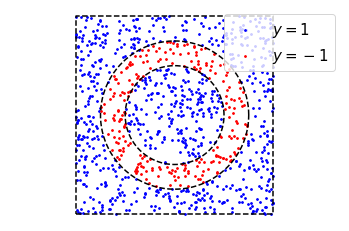

In [109]:
# pb
pb = ToyPb(name = "ring", bounds = (-1,1), loss="demanding")

# data
ndata = 1000
data = nD_data(n = ndata, pb = pb, init_pred=True)

data.show_class()
pb.show_border('k--')
plt.legend(loc=1, fontsize=15)
plt.show()

# nn
CardNodes = (2, 8, 8, 8, 1)
nn= ToyNN(card = CardNodes, coef_bounds=(-1,1,-1,1),  chi="tanh", grid=(-1,1,41))

In [110]:
## Paramètres de l'algorithme
shrink_threshold = lambda a,t : np.where(abs(a)<t, 0, np.where(a<0, a + t, a - t))

batch,epoch = 30,400

alpha0 = .05
Lambda = 0.001
fact_alpha=0 


In [111]:
## Initialisations 
A = nn.create_rand() 
nepoch, k = 0, 0

error  = nn.total_loss(A, data, pb=pb)
print(f"Epoch: {0},  Loss: {error:1.5e}, Number of parameters :{nn.Nparam}")

Erreur = [error]
NonParcimonie = [1]

Epoch: 0,  Loss: 1.16494e+00, Number of parameters :177


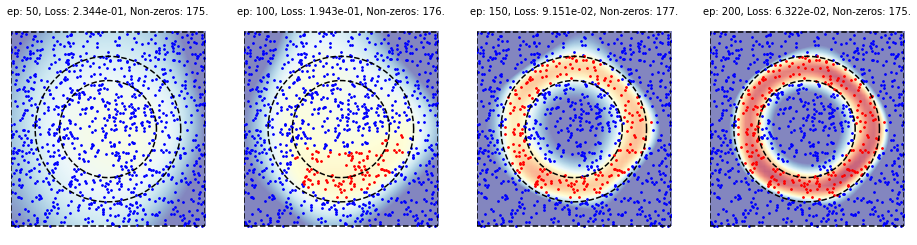

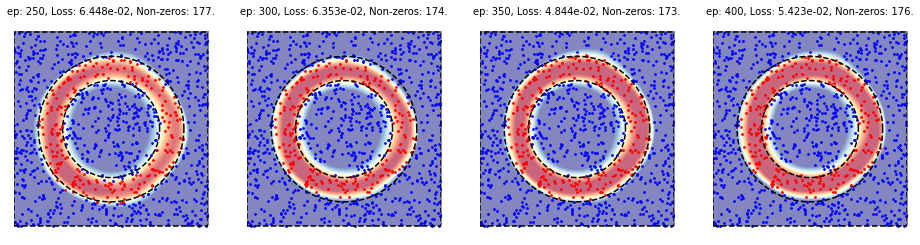

In [112]:
## ISTA-Iterations
plotpos=0
for i_ in range(epoch):
    for j_ in range(ndata//batch): 
        alpha = alpha0/(1 + fact_alpha*k)
        threshold = Lambda*alpha
        I=nprd.choice(ndata, batch)  
        DA = nn.create_zero()
        for i in I:
            x, y = data.X[i], data.Y[i]
            nn.descent(A, x, y, alpha=alpha/batch, B=DA, pb=pb)
        nn.add(A, DA, output=False)
        nn.maps(shrink_threshold, A, output=False,param=threshold)
        k+= 1
    nepoch +=1    
 
    #Calcul de l'erreur et de la parcimonie
    if not nepoch%50:
        error = nn.total_loss_and_prediction(A,data,pb=pb)
        Erreur.append(error)
        nonzeros=nn.count_non_zero(A)
        NonParcimonie.append(nonzeros/nn.Nparam)
        if not plotpos: plt.figure(figsize=(16,4))
        plotpos+=1
        plt.subplot(1,4,plotpos)
        data.show_class(pred=True)
        nn.show_pred(A)
        pb.show_border('k--')
        plt.title(f"ep: {nepoch}, Loss: {error:1.3e}, Non-zeros: {nonzeros}.",
                  fontsize=10)
        if plotpos==4 :  plt.show(); plotpos=0
    else:
        error = nn.total_loss(A,data,pb=pb)
        Erreur.append(error)
        nonzeros=nn.count_non_zero(A)
        NonParcimonie.append(nonzeros/nn.Nparam)

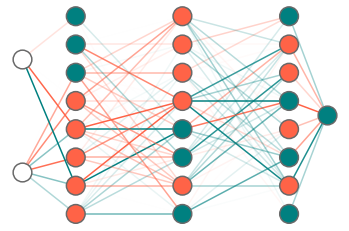

Erreur initiale : 1.16494e+00


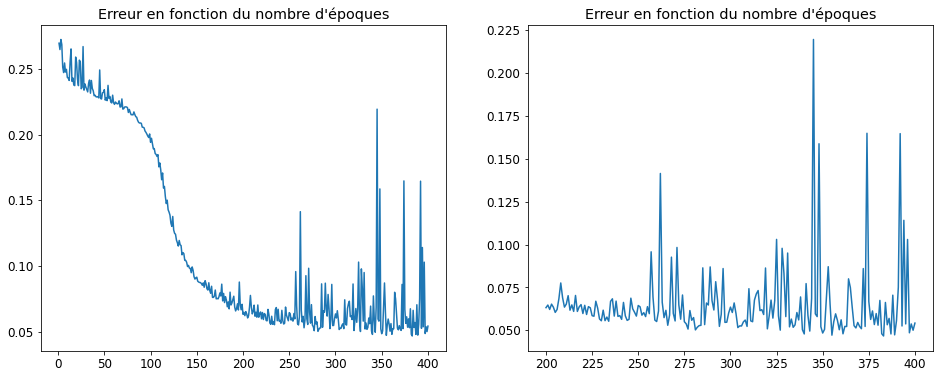

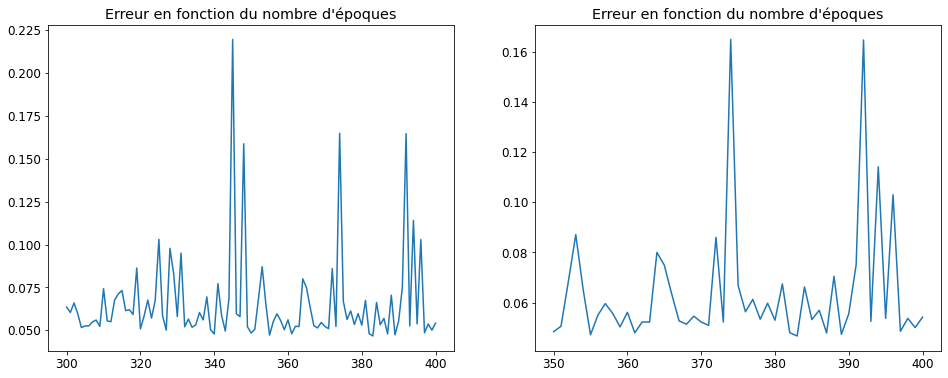

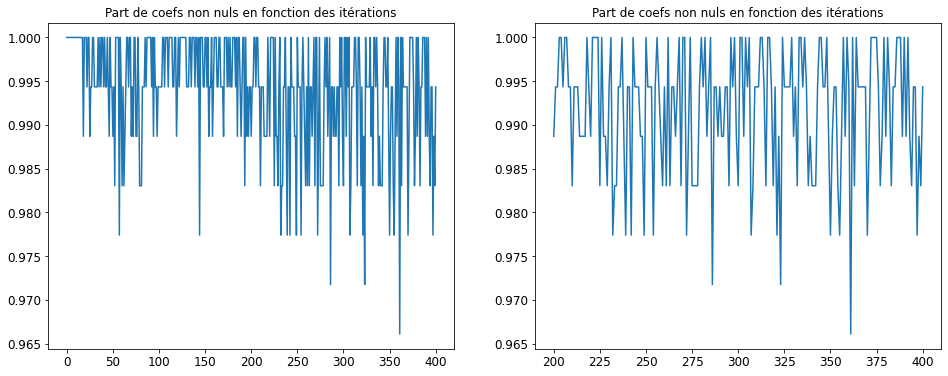

In [113]:
## Représentations graphiques de l'évolution de l'erreur au cours des époques.

nn.show(A)

print(f"Erreur initiale : {Erreur[0]:1.5e}")

plt.figure(figsize=(16,6))
plt.subplot(121)
debut = 1
plt.plot(np.linspace(debut, nepoch,nepoch-debut + 1),Erreur[debut:])
plt.title("Erreur en fonction du nombre d'époques")

plt.subplot(122)
debut = nepoch//2
plt.plot(np.linspace(debut, nepoch,nepoch-debut + 1),Erreur[debut:])
plt.title("Erreur en fonction du nombre d'époques")
plt.show()

plt.figure(figsize=(16,6))
plt.subplot(121)
debut = 3*(nepoch//4)
plt.plot(np.linspace(debut, nepoch,nepoch - debut + 1),Erreur[debut:])
plt.title("Erreur en fonction du nombre d'époques")

plt.subplot(122)
debut = 7*(nepoch//8)
plt.plot(np.linspace(debut, nepoch,nepoch - debut + 1),Erreur[debut:])
plt.title("Erreur en fonction du nombre d'époques")
plt.show()

plt.figure(figsize=(16,6))
plt.subplot(121)
plt.plot(NonParcimonie)
plt.title(f"Part de coefs non nuls en fonction des itérations", fontsize=12)

plt.subplot(122)
debut = nepoch//2
plt.plot(np.linspace(debut, nepoch,nepoch-debut + 1),NonParcimonie[debut:])
plt.title(f"Part de coefs non nuls en fonction des itérations", fontsize=12)
plt.show()

Au début, l'erreur descend très vite et relativement peu de coefficients sont nuls, mais lorsque que l'on s'approche de la solution de nombreuses variations apparaissent à la fois dans l'erreur et dans le nombre de coefficients non nuls.  Il n'y a jamais beaucoup de coefficients nuls.

Pour $\lambda>0$ assez petit ($\lambda<\lambda^*$) il n'y a pas de paramètres nuls, ensuite, plus $\lambda$ *est grand, plus le nombre de paramètres avec la valeur 0 est important. Dans cet exemple particulier, le seuil se situe entre $\lambda=10^{-3}$ et $\lambda=2\cdot10^{-3}$. Le processus qui mène à l'annulation de certains coefficients est assez lent. Il peut être nécessaite de relancer la boucle d'optimisation plusieurs fois.

<a id='bot'></a>
<a href="#toc">top</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I">I.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I1">I.1</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I2">I.2</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I3">I.3</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#II">II.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#II1">II.1</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#II2">II.2</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#III">III.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#bot">bot.</a>